In [1]:
import re
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from wordcloud import WordCloud


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier





In [2]:
data1 = pd.read_csv("uciData.csv")
data1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# drop the last three axis on data1, rename the first two columns
data1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data1.rename(columns={'v1':'Spam Status','v2':'Message'},inplace=True)

# Swap the positions of column(Spam) and column(Message))
data1 = data1.reindex(columns=['Message', 'Spam Status'])
data1.head()

,Message,Spam Status
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
data2 = pd.read_csv("DSNdata.csv")
data2.head()

,Text,BVN Spam,Investment Scam,419 Scams,Fake Job,Legitimate Texts
0,We have successfully completed our upgrade. Si...,0,0,0,0,1
1,Our branches will close at 2:00 pm this Friday...,0,0,0,0,1
2,"Dear Customer,\nThis is a confirmation that th...",1,0,0,0,0
3,"Hello ADEYINKA, present your CV for interview ...",0,0,0,1,0
4,Edgerit Limited invites you for an interview f...,0,0,0,1,0


In [6]:
data2.info
#print(data2.columns)

<bound method DataFrame.info of                                                    Text   BVN Spam  \
0     We have successfully completed our upgrade. Si...          0   
1     Our branches will close at 2:00 pm this Friday...          0   
2     Dear Customer,\nThis is a confirmation that th...          1   
3     Hello ADEYINKA, present your CV for interview ...          0   
4     Edgerit Limited invites you for an interview f...          0   
...                                                 ...        ...   
1134  Whenever, Wherever, for Whatever. Make Transfe...          0   
1135  Dear Customer, Get online instead of waiting i...          0   
1136  Dear Customer, do you know you can make paymen...          0   
1137  Dear ONILUDE GBEMILEKE AYANGUNNA we realize ho...          0   
1138  Enjoy NO LIMIT on international POS/WEB transa...          0   

      Investment Scam  419 Scams  Fake Job  Legitimate Texts  
0                   0          0         0                 1  
1

In [7]:
# drop the last three axis on data2, rename the first two columns
data2.drop([' BVN Spam', 'Investment Scam', '419 Scams', 'Fake Job'], axis=1, inplace=True)
data2.rename(columns={'Text':'Message','Legitimate Texts':'Spam Status'},inplace=True)

data2.head()

,Message,Spam Status
0,We have successfully completed our upgrade. Si...,1
1,Our branches will close at 2:00 pm this Friday...,1
2,"Dear Customer,\nThis is a confirmation that th...",0
3,"Hello ADEYINKA, present your CV for interview ...",0
4,Edgerit Limited invites you for an interview f...,0


In [8]:
#change spam status from 0 = spam 1= ham to make all three have thesame value
data2['Spam Status'] = data2['Spam Status'].map({0:'spam', 1:'ham'})
data2.head()

,Message,Spam Status
0,We have successfully completed our upgrade. Si...,ham
1,Our branches will close at 2:00 pm this Friday...,ham
2,"Dear Customer,\nThis is a confirmation that th...",spam
3,"Hello ADEYINKA, present your CV for interview ...",spam
4,Edgerit Limited invites you for an interview f...,spam


In [9]:
data3 = pd.read_csv("localSpam.csv")
data3.head()

,Spam Status,Message
0,spam,FREE MESSAGE Activate your 500 FREE Text Messa...
1,spam,Congrats! 1 year special cinema pass for 2 is ...
2,spam,+123 Congratulations - in this week's competit...
3,spam,"You are guaranteed the latest Nokia Phone, a 4..."
4,spam,Boltblue tones for 150p Reply POLY# or MONO# e...


In [10]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Spam Status  275 non-null    object
 1   Message      275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB


In [11]:
# Swap the positions of column(Spam) and column(Message))
data3 = data3.reindex(columns=['Message', 'Spam Status'])
data3.head()

,Message,Spam Status
0,FREE MESSAGE Activate your 500 FREE Text Messa...,spam
1,Congrats! 1 year special cinema pass for 2 is ...,spam
2,+123 Congratulations - in this week's competit...,spam
3,"You are guaranteed the latest Nokia Phone, a 4...",spam
4,Boltblue tones for 150p Reply POLY# or MONO# e...,spam


In [12]:
# Vertically stack the DataFrames
combined_data = pd.concat([data2, data1, data3], ignore_index=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Message      6986 non-null   object
 1   Spam Status  6986 non-null   object
dtypes: object(2)
memory usage: 109.3+ KB


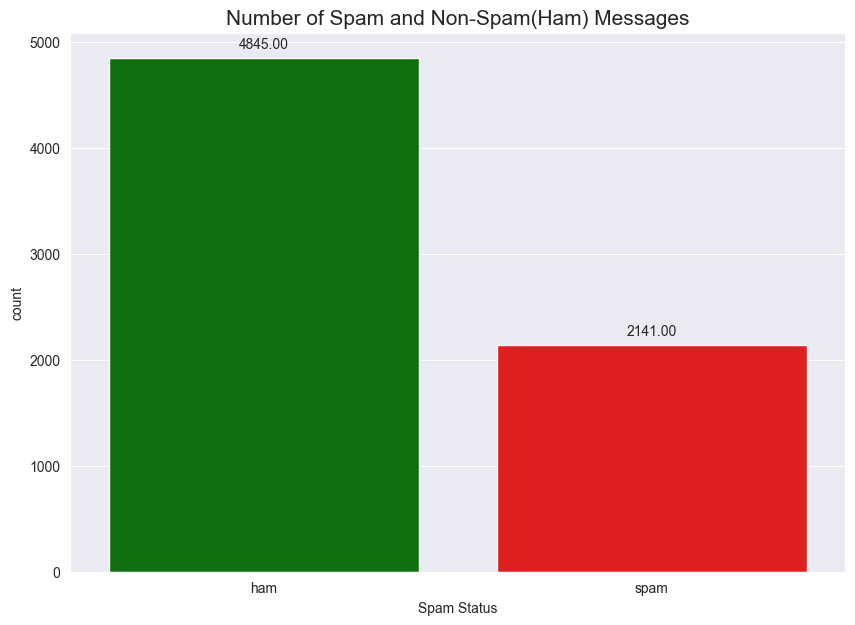

In [13]:
# plt.subplots(figsize=(10,8))
# ax = sns.countplot(x="Spam Status", data=combined_data)

plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
custom_colors = ["green", "red"]
splot = sns.countplot(x="Spam Status",data=combined_data, palette=custom_colors)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Number of Spam and Non-Spam(Ham) Messages', size=15)
plt.show()

In [14]:
#Using binary classification for easy analysis on the label 
combined_data['Spam Status'] = combined_data['Spam Status'].apply(lambda label: 0 if label == 'ham' else 1)
combined_data.head()

,Message,Spam Status
0,We have successfully completed our upgrade. Si...,0
1,Our branches will close at 2:00 pm this Friday...,0
2,"Dear Customer,\nThis is a confirmation that th...",1
3,"Hello ADEYINKA, present your CV for interview ...",1
4,Edgerit Limited invites you for an interview f...,1


In [15]:
combined_data.groupby('Spam Status').describe()

Message                                                            \
              count unique                                                top   
Spam Status                                                                     
0              4845   4536                             Sorry, I'll call later   
1              2141   1764  Please call our customer service representativ...   

                  
            freq  
Spam Status       
0             30  
1              7

In [16]:
combined_data['Spam Status'].value_counts()

Spam Status
0    4845
1    2141
Name: count, dtype: int64

In [17]:
combined_data_spam = combined_data[combined_data['Spam Status']==1]

combined_data_ham = combined_data[combined_data['Spam Status']==0]

In [18]:
data1_spam = data1[data1['Spam Status']=='spam']

data1_ham = data1[data1['Spam Status']=='ham']

In [19]:
combined_data_ham_downsampled = combined_data_ham.sample(combined_data_spam.shape[0])
combined_data_ham_downsampled.shape

(2141, 2)

In [20]:
data1_ham_downsampled = data1_ham.sample(data1_spam.shape[0])
data1_ham_downsampled.shape

(747, 2)

In [21]:
combined_data_balanced = pd.concat([combined_data_ham_downsampled, combined_data_spam])
combined_data_balanced.shape

(4282, 2)

In [22]:
data1_balanced = pd.concat([data1_ham_downsampled, data1_spam])
data1_balanced.shape

(1494, 2)

In [23]:
combined_data_balanced['Spam Status'].value_counts()


Spam Status
0    2141
1    2141
Name: count, dtype: int64

In [24]:

combined_data_balanced.head()


,Message,Spam Status
1418,All done? All handed in? Celebrations in full ...,0
4457,Kay... Since we are out already,0
2777,Great comedy..cant stop laughing da:),0
5698,I'm awake oh. What's up.,0
3603,They will pick up and drop in car.so no problem..,0


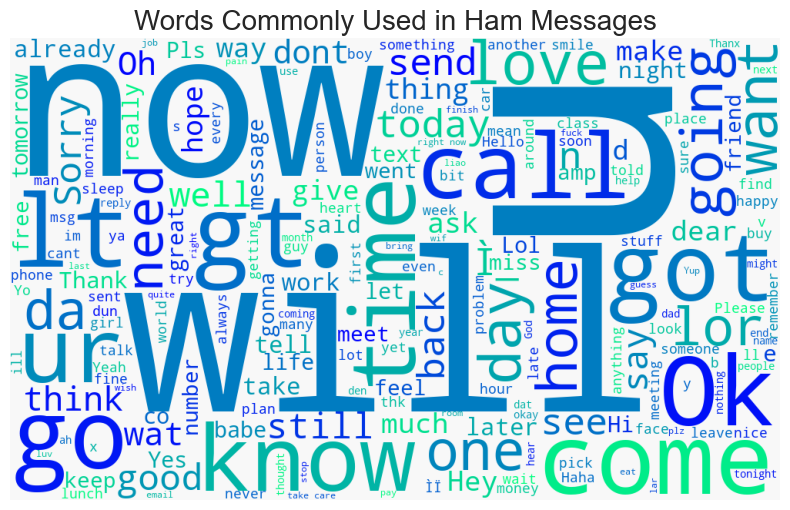

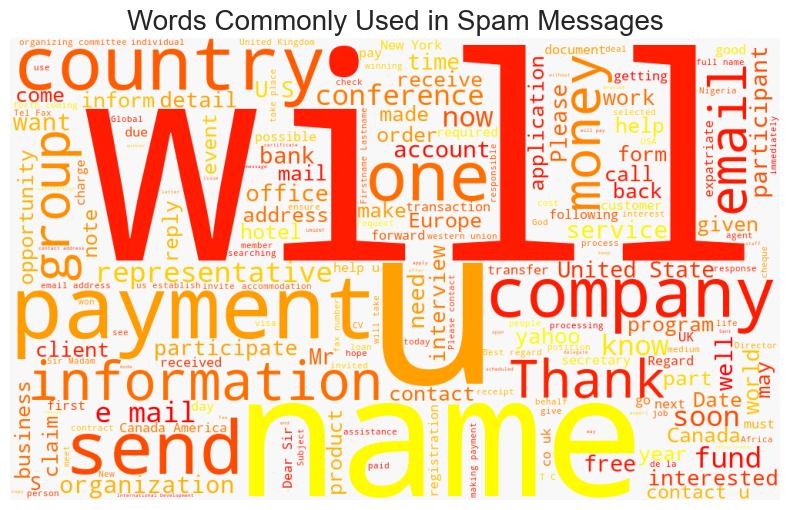

In [25]:
for spam_label, cmap in zip([0, 1], ["winter", "autumn"]):
    text = " ".join(combined_data_balanced.loc[combined_data_balanced["Spam Status"] == spam_label, "Message"])
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in {'Spam' if spam_label == 1 else 'Ham'} Messages", size=20)
    plt.show()

In [26]:
# Count the number of words in the message
combined_data_balanced["num_words"] = combined_data_balanced["Message"].apply(lambda s: len(re.findall(r'\w+', s)))

# Get the length of the text message
combined_data_balanced["message_len"] = combined_data_balanced["Message"].apply(len)

# Count the number of uppercased characters
combined_data_balanced["num_uppercase_chars"] = combined_data_balanced["Message"].apply(lambda s: sum(1 for c in s if c.isupper())) 

# Count the numbe rof uppercased words
combined_data_balanced["num_uppercase_words"] = combined_data_balanced["Message"].apply(lambda s: len(re.findall(r"\b[A-Z][A-Z]+\b", s)))

# Check if the message contains the word "free" or "win"
combined_data_balanced["contains_free_or_win"] = combined_data_balanced["Message"].apply(lambda s: int("free" in s.lower() or "win" in s.lower()))

In [27]:
# Count the number of words in the message
data1_balanced["num_words"] = data1_balanced["Message"].apply(lambda s: len(re.findall(r'\w+', s)))

# Get the length of the text message
data1_balanced["message_len"] = data1_balanced["Message"].apply(len)

# Count the number of uppercased characters
data1_balanced["num_uppercase_chars"] = data1_balanced["Message"].apply(lambda s: sum(1 for c in s if c.isupper())) 

# Count the numbe rof uppercased words
data1_balanced["num_uppercase_words"] = data1_balanced["Message"].apply(lambda s: len(re.findall(r"\b[A-Z][A-Z]+\b", s)))
HHHH[]
# Check if the message contains the word "free" or "win"
data1_balanced["contains_free_or_win"] = data1_balanced["Message"].apply(lambda s: int("free" in s.lower() or "win" in s.lower()))

In [28]:
# Initialize StandardScaler
scaler = preprocessing.StandardScaler()

# Dont standerdize binary columns and the text column
feats_to_scale = combined_data_balanced.drop(["Spam_Status","Message", "contains_free_or_win"], axis=1)

# Create a new dataframe with the standardized features
scaled_features = pd.DataFrame(scaler.fit_transform(feats_to_scale))
scaled_features.rename(
    {768: "num_words", 769:"message_len", 770: "num_uppercase_chars", 771: "num_uppercase_words"},
    axis=1,
    inplace=True
)

# Update the dataset with the new standerdized features
scaled_combined_data_balanced = combined_data_balanced.copy()
scaled_combined_data_balanced.update(scaled_features)

KeyError: "['Spam_Status'] not found in axis"

In [ ]:
# Initialize StandardScaler
scaler = preprocessing.StandardScaler()

# Dont standerdize binary columns and the text column
feats_to_scale = data1_balanced.drop(["Spam Status","Message", "contains_free_or_win"], axis=1)

# Create a new dataframe with the standardized features
scaled_features = pd.DataFrame(scaler.fit_transform(feats_to_scale))
scaled_features.rename(
    {768: "num_words", 769:"message_len", 770: "num_uppercase_chars", 771: "num_uppercase_words"},
    axis=1,
    inplace=True
)

# Update the dataset with the new standerdized features
scaled_data1_balanced = data1_balanced.copy()
scaled_data1_balanced.update(scaled_features)

In [ ]:
X = scaled_combined_data_balanced.drop(["Spam_Status","Message"], axis=1)
y = scaled_combined_data_balanced["Spam_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_train)

In [ ]:
# creating the dataframe for plotting
def creat_plotting_data(data, labels=y_train, rename=False):
    """Creates a dataframe from the given data, used for plotting"""
    
    combined_data_balanced = pd.DataFrame(data)
    combined_data_balanced["Spam Status"] = labels.to_numpy()
    
    if rename:
        combined_data_balanced.rename({0:"v1", 1:"v2"}, axis=1, inplace=True)
        
    return combined_data_balanced

# creating the dataframes for plotting
plotting_data_embedded = creat_plotting_data(X_embedded, rename=True)

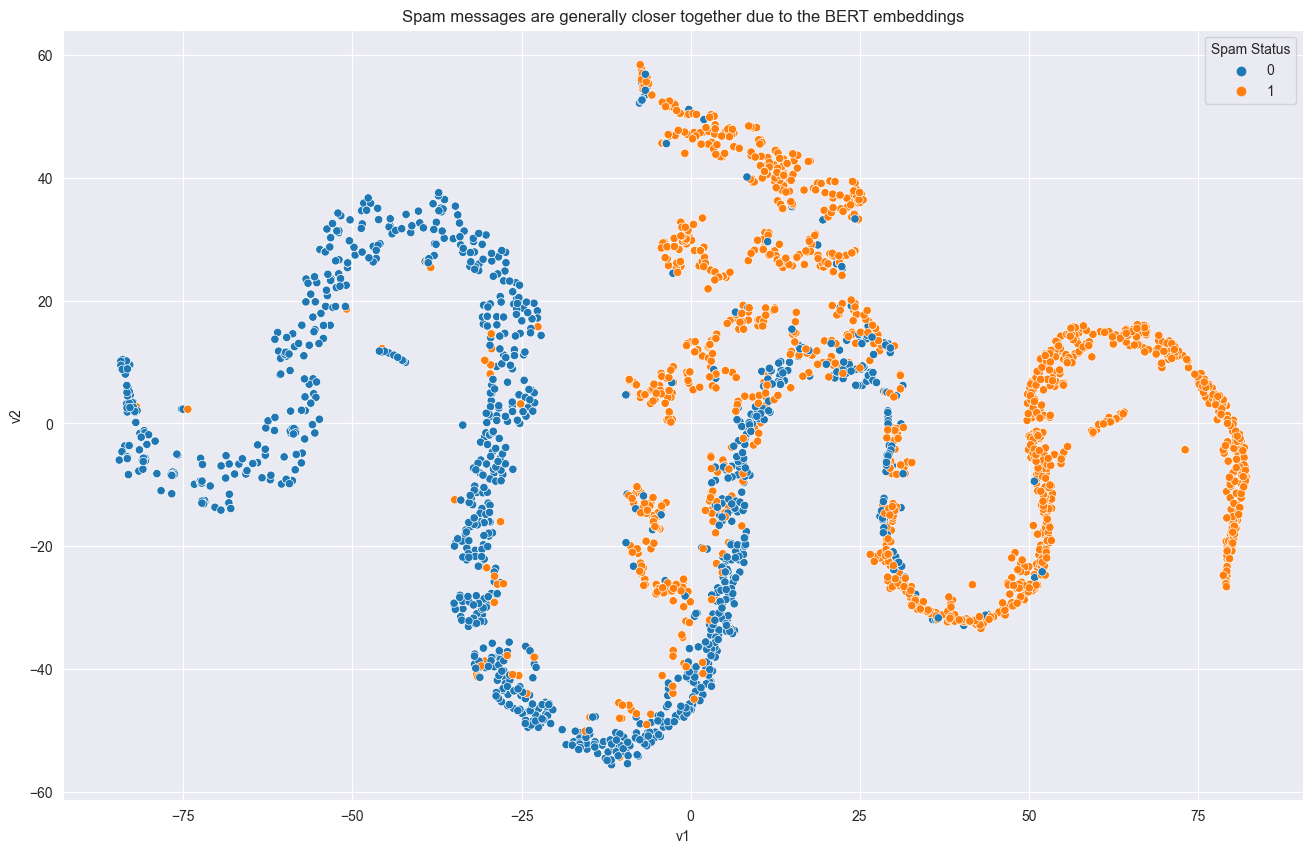

In [ ]:
plt.figure(figsize=(16, 10))
ax = sns.scatterplot(x="v1", y="v2", hue="Spam Status", data=plotting_data_embedded)
ax.set(title = "Spam messages are generally closer together due to the BERT embeddings")
plt.show()

In [ ]:
X = scaled_data1_balanced.drop(["Spam Status","Message"], axis=1)
y = scaled_data1_balanced["Spam Status"]

X1_train, X1_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
X2_embedded = TSNE(n_components=2, random_state=42).fit_transform(X1_train)

In [ ]:
# creating the dataframe for plotting
def creat_plotting_data1(data, labels=y_train, rename=False):
    """Creates a dataframe from the given data, used for plotting"""
    
    data1_balanced = pd.DataFrame(data)
    data1_balanced["Spam Status"] = labels.to_numpy()
    
    if rename:
        data1_balanced.rename({0:"v1", 1:"v2"}, axis=1, inplace=True)
        
    return data1_balanced

# creating the dataframes for plotting
plotting_data_embedded2 = creat_plotting_data1(X2_embedded, rename=True)

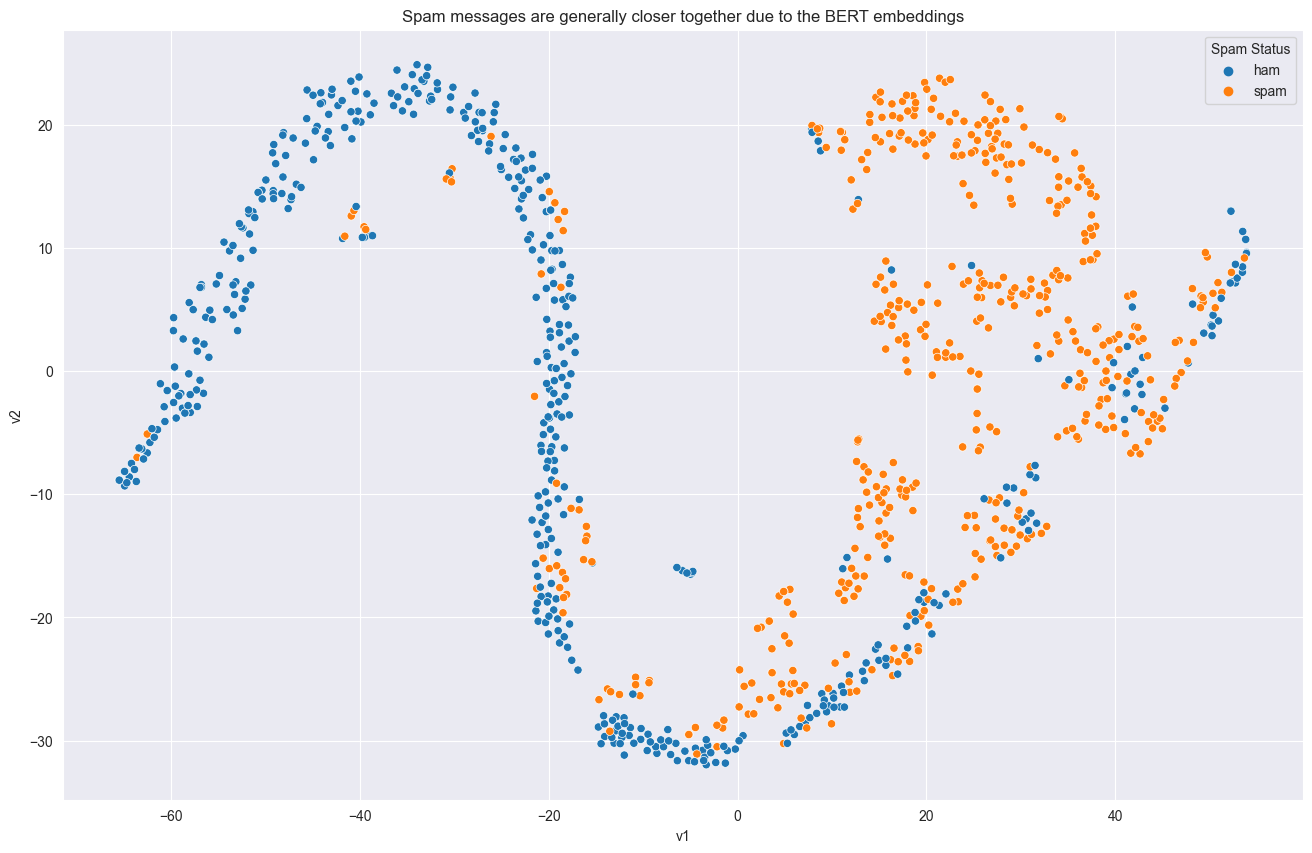

In [ ]:
plt.figure(figsize=(16, 10))
ax = sns.scatterplot(x="v1", y="v2", hue="Spam Status", data=plotting_data_embedded2)
ax.set(title = "Spam messages are generally closer together due to the BERT embeddings")
plt.show()

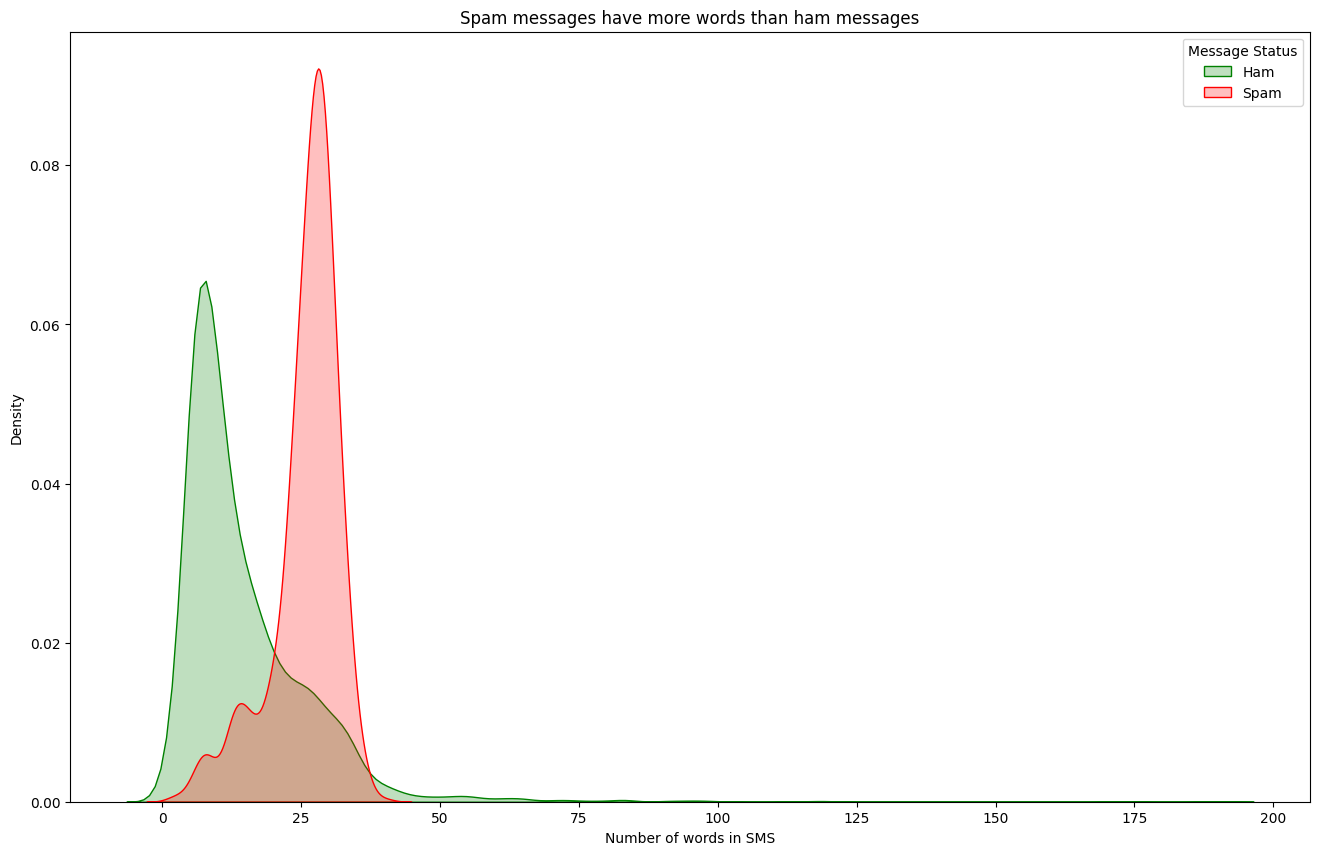

In [ ]:
# Rename the column
data1.rename(columns={'Spam Status': 'Spam_Status'}, inplace=True)

# Count the number of words in the message
data1["num_words"] = data1["Message"].apply(lambda s: len(re.findall(r'\w+', s)))

# Create kernel density plots
_, ax = plt.subplots(figsize=(16, 10))
sns.kdeplot(data1.loc[data1.Spam_Status == 'ham', "num_words"], fill=True, label="ham", color="green")
sns.kdeplot(data1.loc[data1.Spam_Status == 'spam', "num_words"], fill=True, label="spam", color="red")

# Set x and y labels, title, and legend
ax.set(xlabel="Number of words in SMS", ylabel="Density", title="Spam messages have more words than ham messages")
ax.legend(title="Message Status", labels=["Ham", "Spam"])

plt.show()

In [ ]:
# Get the length of the text message
data1["message_len"] = data1["Message"].apply(len)

# Count the number of uppercased characters
data1["num_uppercase_chars"] = data1["Message"].apply(lambda s: sum(1 for c in s if c.isupper())) 

# Count the numbe rof uppercased words
data1["num_uppercase_words"] = data1["Message"].apply(lambda s: len(re.findall(r"\b[A-Z][A-Z]+\b", s)))

# Check if the message contains the word "free" or "win"
data1["contains_free_or_win"] = data1["Message"].apply(lambda s: int("free" in s.lower() or "win" in s.lower()))

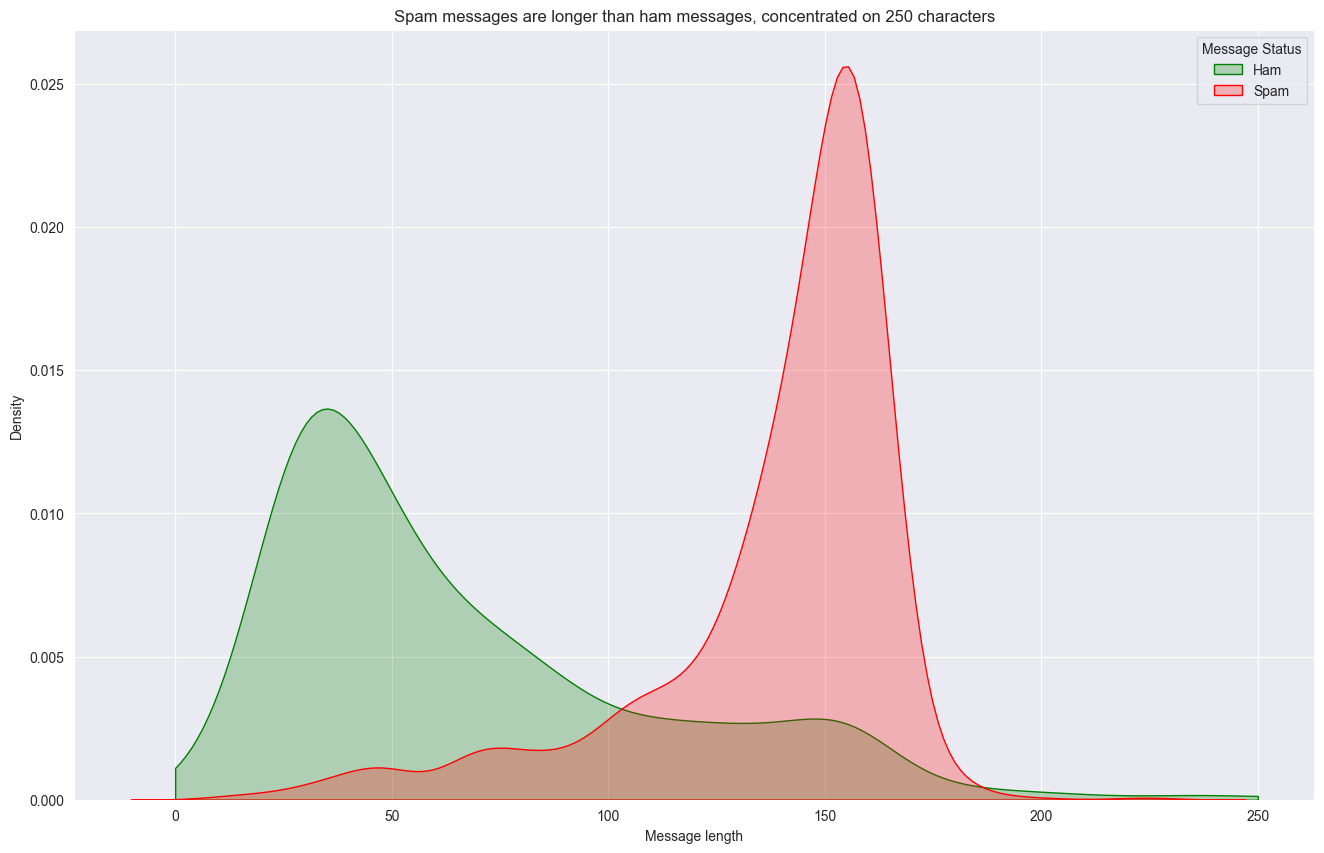

In [ ]:
_,ax = plt.subplots(figsize=(16,10))
sns.kdeplot(data1.loc[data1.Spam_Status == 'ham', "message_len"], fill=True, label="Ham", color="green", clip=(0, 250)) # removing observations with message length above 250 because there is an outlier
sns.kdeplot(data1.loc[data1.Spam_Status == 'spam', "message_len"], fill=True, label="Spam",color="red")

# Set x and y labels, title, and legend
ax.set(xlabel = "Message length", ylabel = "Density",title = "Spam messages are longer than ham messages, concentrated on 250 characters")

ax.legend(title="Message Status", labels=["Ham", "Spam"])

plt.show()

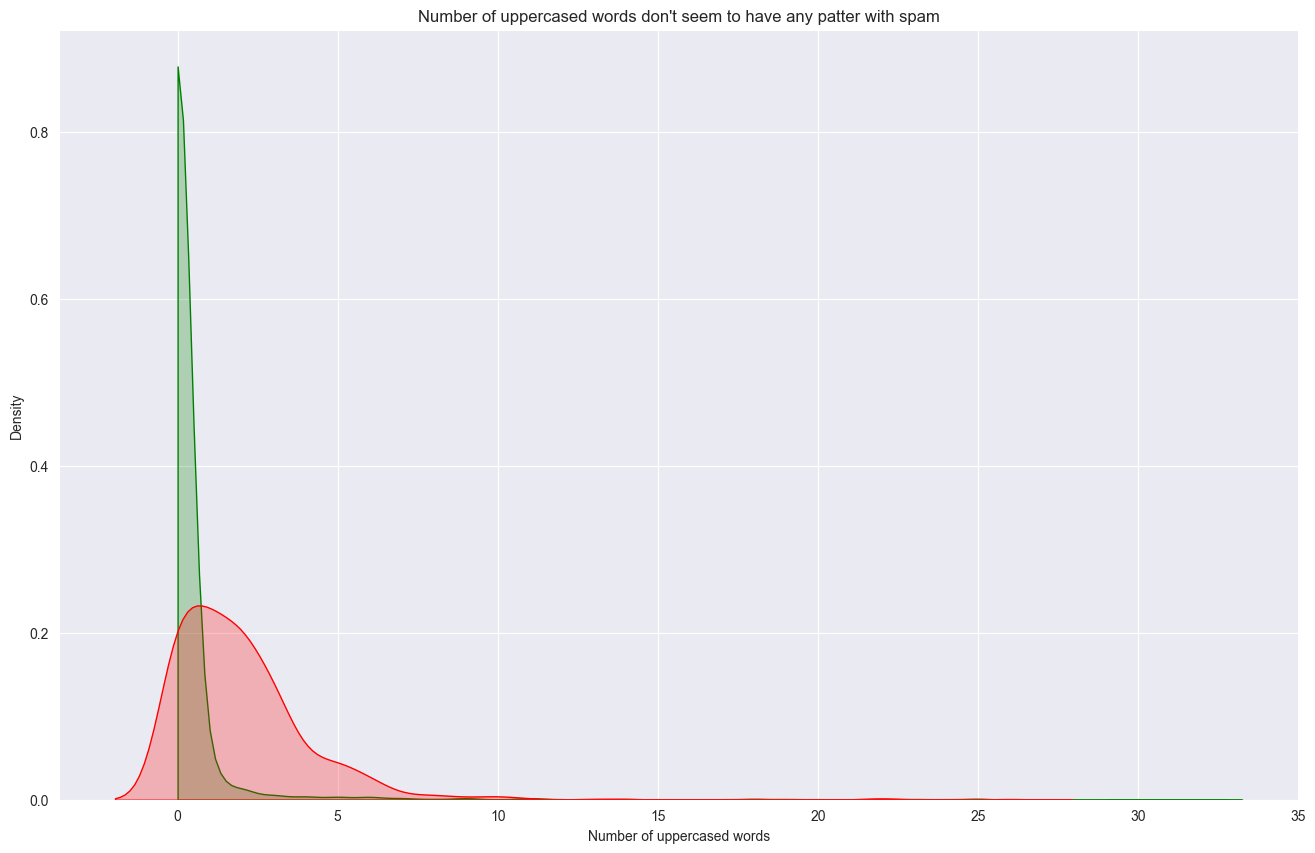

In [ ]:
_,ax = plt.subplots(figsize=(16,10))
sns.kdeplot(data1.loc[data1.Spam_Status == 'ham', "num_uppercase_words"], fill=True, label="Ham",color="green", clip=(0, 250)) # removing observations with message length above 250 because there is an outlier
sns.kdeplot(data1.loc[data1.Spam_Status == 'spam', "num_uppercase_words"], fill=True, label="Spam",color="red")
ax.set(xlabel = "Number of uppercased words", ylabel = "Density",title = "Number of uppercased words don't seem to have any pattern with spam")
plt.show()

  Spam_Status  contains_free_or_win  Percentage of group
0         ham                     0              0.90000
1         ham                     1              0.10000
2        spam                     0              0.68454
3        spam                     1              0.31546


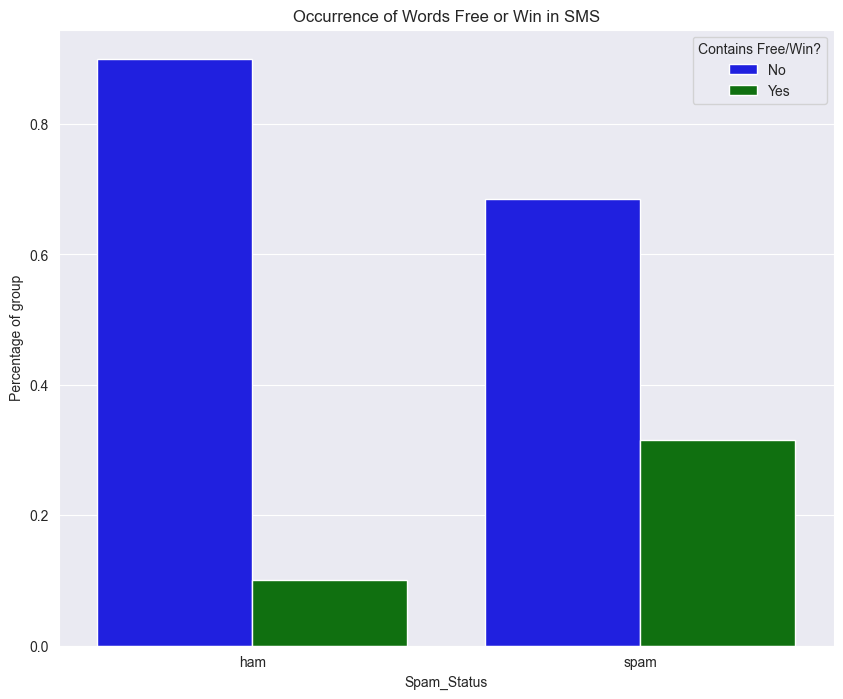

In [ ]:
# Check if the message contains the word "free" or "win"
data2["contains_free_or_win"] = data2["Message"].apply(lambda s: int("free" in s.lower() or "win" in s.lower()))

plt.subplots(figsize=(10,8))

# Get the proportion of the genders grouped by the attrition status
grouped_data = data2.groupby("Spam_Status")["contains_free_or_win"].value_counts(normalize = True).rename("Percentage of group").reset_index()
print(grouped_data)

# Map 0 and 1 to custom labels for the legend
grouped_data["contains_free_or_win"] = grouped_data["contains_free_or_win"].map({0: "No", 1: "Yes"})

# Set custom colors for the hue values (0 and 1)
custom_colors = ["blue", "green"]

# Plot the result and specify the custom palette
ax = sns.barplot(x="Spam_Status", y="Percentage of group", hue="contains_free_or_win", data=grouped_data, palette=custom_colors)
ax.set(title = "Occurrence of Words Free or Win in SMS")
# Set the custom legend labels
ax.legend(title="Contains Free/Win?")


In [ ]:
# Get the length of the text message
combined_data["message_len"] = combined_data["Message"].apply(len)

# Count the number of uppercased characters
combined_data["num_uppercase_chars"] = combined_data["Message"].apply(lambda s: sum(1 for c in s if c.isupper())) 

# Rename the column
combined_data.rename(columns={'Spam Status': 'Spam_Status'}, inplace=True)


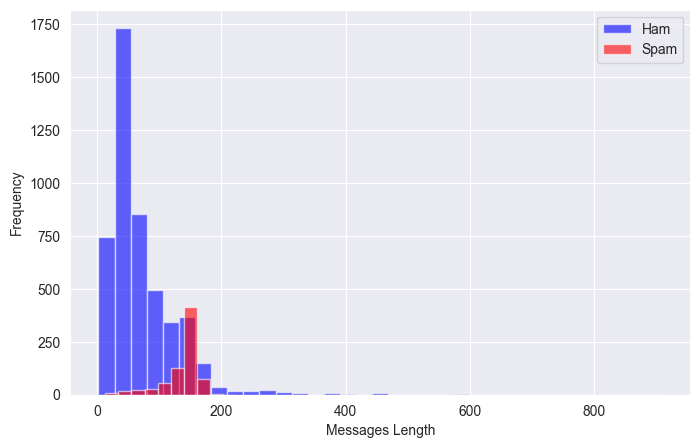

In [ ]:
plt.figure(figsize=(8, 5))
data1[data1.Spam_Status == 'ham'].message_len.plot(bins=35, kind='hist', color='blue', label='Ham', alpha=0.6)
data1[data1.Spam_Status == 'spam'].message_len.plot(kind='hist', color='red', label='Spam', alpha=0.6)
plt.legend()
plt.xlabel("Messages Length");

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
print(stop_words[::10])

porter = PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


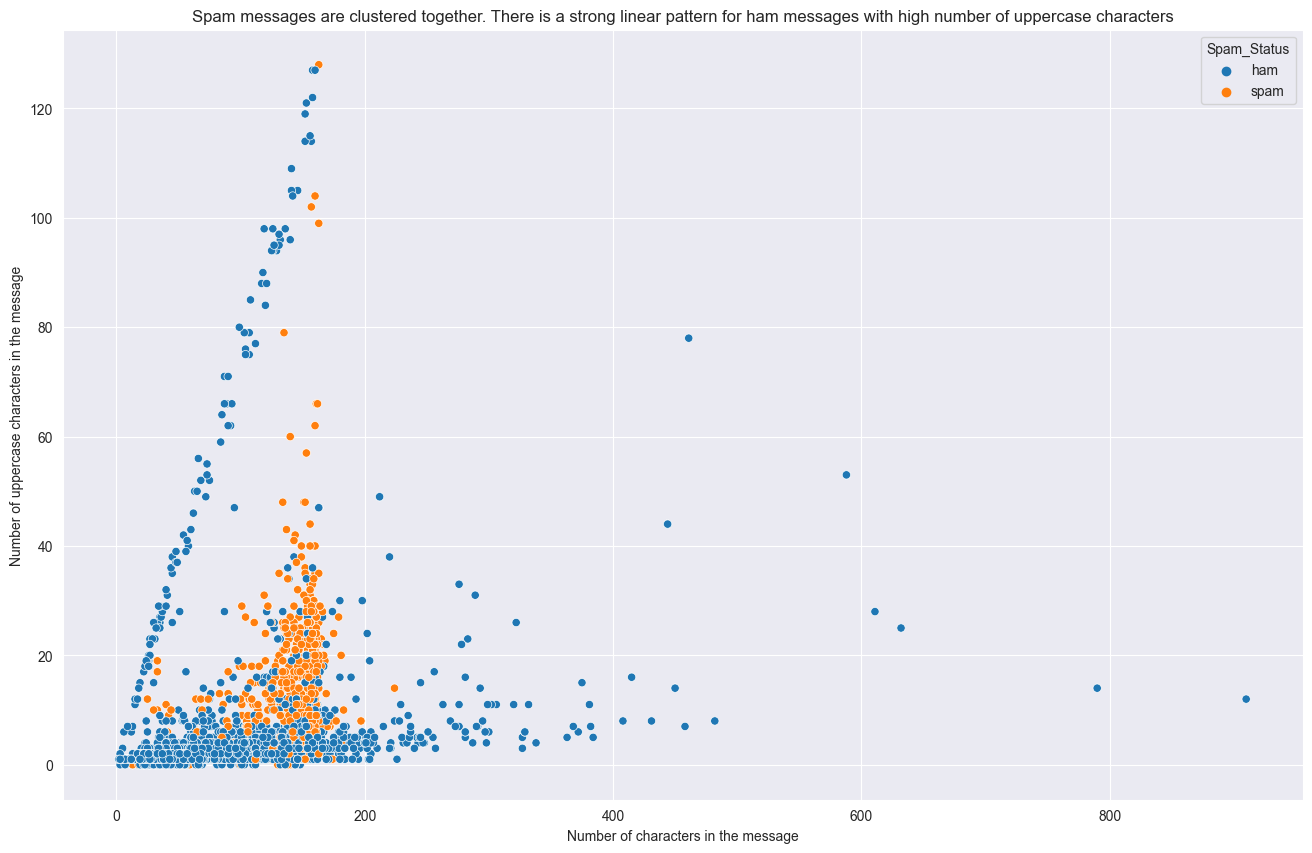

In [ ]:
plt.subplots(figsize=(16,10))
ax = sns.scatterplot(x="message_len", y="num_uppercase_chars", hue="Spam_Status", data=data1)
ax.set(
    xlabel="Number of characters in the message",
    ylabel="Number of uppercase characters in the message",
    title="Spam messages are clustered together. There is a strong linear pattern for ham messages with high number of uppercase characters")
plt.show()

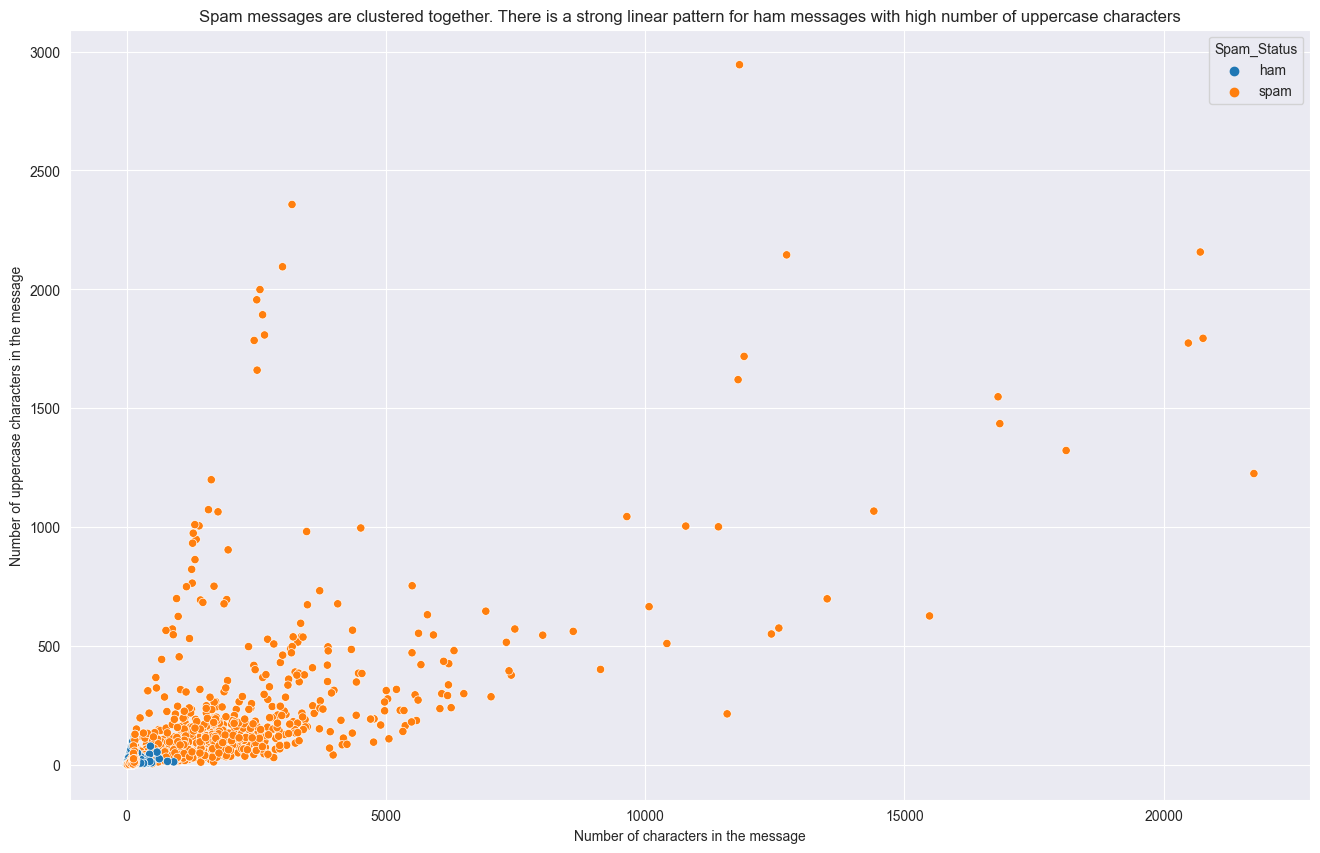

In [ ]:
plt.subplots(figsize=(16,10))
ax = sns.scatterplot(x="message_len", y="num_uppercase_chars", hue="Spam_Status", data=combined_data)
ax.set(
    xlabel="Number of characters in the message",
    ylabel="Number of uppercase characters in the message",
    title="Spam messages are clustered together. There is a strong linear pattern for ham messages with high number of uppercase characters")
plt.show()

In [ ]:
model = Sequential()

model.add(Dense(1000, input_shape=(773,), activation="relu"))
model.add(BatchNormalization(axis=-1))

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(10, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

In [ ]:

# defining the learning rate, the number of epochs and the batch size
INIT_LR = 0.001
NUM_EPOCHS = 30
BS = 64
opt = RMSprop(lr = INIT_LR)

# This is just a necessary step to compile the model, we don't actually need it because we're not using the old model
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

# Reduce the learning rate by half if validation accuracy has not increased in the last 3 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

fitted_network = model.fit(X1_train, y_train, validation_split=0.2, batch_size=BS, epochs=NUM_EPOCHS, callbacks=[learning_rate_reduction])

Epoch 1/30


ValueError: in user code:

    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 773), found shape=(64, 5)


In [ ]:

def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [ ]:
data1['Message'] = data1['Message'].apply(clean_text)
data1.head()

,Message,Spam_Status,num_words,message_len,num_uppercase_chars,num_uppercase_words,contains_free_or_win
0,go until jurong point crazy available only in ...,ham,20,111,3,0,0
1,ok lar joking wif u oni,ham,6,29,2,0,0
2,free entry in a wkly comp to win fa cup final ...,spam,33,155,10,2,1
3,u dun say so early hor u c already then say,ham,11,49,2,0,0
4,nah i don t think he goes to usf he lives arou...,ham,14,61,2,0,0


In [ ]:
data1['Message'] = data1['Message'].apply(remove_stopwords)
data1['Message'] = data1['Message'].apply(stemmer)
data1.head()

,Message,Spam_Status,num_words,message_len,num_uppercase_chars,num_uppercase_words,contains_free_or_win
0,go jurong point crazi avail bugi n great world...,ham,20,111,3,0,0
1,ok lar joke wif u oni,ham,6,29,2,0,0
2,free entri wkli comp win fa cup final tkt st m...,spam,33,155,10,2,1
3,u dun say earli hor u c alreadi say,ham,11,49,2,0,0
4,nah think goe usf live around though,ham,14,61,2,0,0


In [ ]:
#save clean data
data1.to_csv('C:\\Users\\LENOVO\\Desktop\\bertSMS\\myenviron\\cleanData.csv')

In [ ]:
X = data1['Message']
y = data1['Spam_Status']

In [ ]:
#Now, we create a numerical feature vector for each document:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)

X_vec = vect.transform(X)

len(vect.get_feature_names_out())

2210

In [ ]:
#We spliting the data into train and test sets:

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 2210)
(1115, 2210)
(4457,)
(1115,)


In [ ]:
smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [ ]:
print(X_train_sm.shape)
print(y_train_sm.shape)

(7752, 2210)
(7752,)


Building models
We use the following classification models:

Logistic Regression,
Naive Bayes Classifier,
Random Forest Classifier,
Gradient Boosting,
SVM (Support Vector Machine),
Stochastic Gradient Descent.
To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn.

In [ ]:
#Logistic regression

model_lr = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',LogisticRegression()),
                   ])

model_lr.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_y = model_lr.predict(X_test)
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.9614349775784753
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       949
        spam       0.84      0.92      0.88       166

    accuracy                           0.96      1115
   macro avg       0.91      0.94      0.93      1115
weighted avg       0.96      0.96      0.96      1115



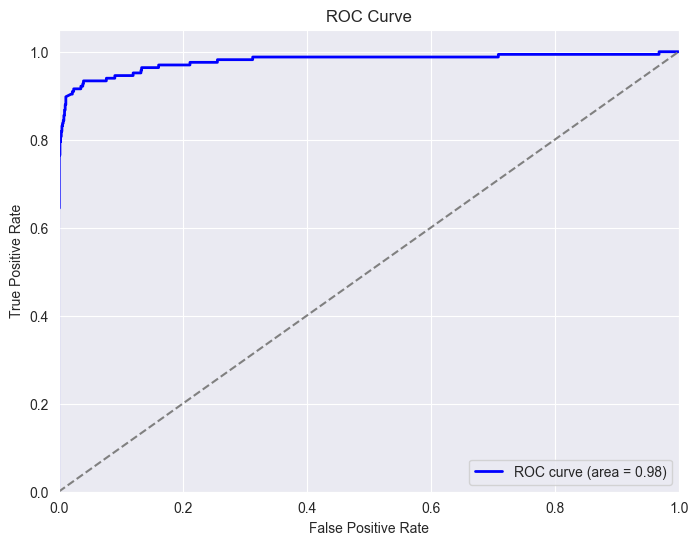

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Encode the target labels into binary format (0 and 1)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Obtain the predicted probabilities for the positive class (class 1)
y_probs = model_lr.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


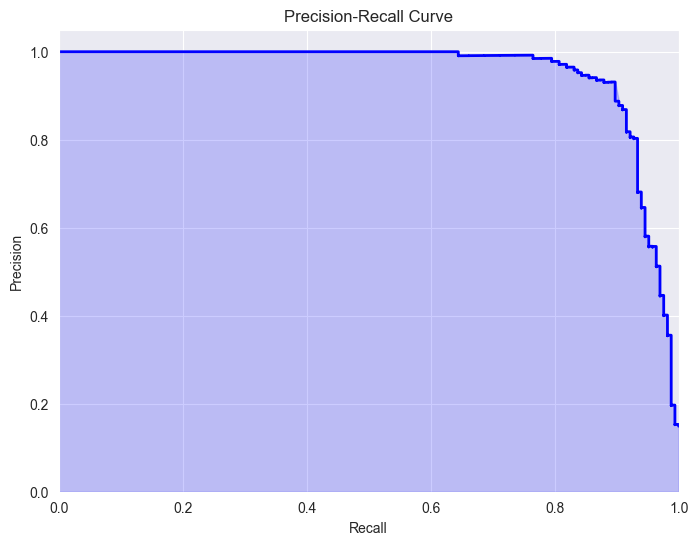

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve

# Encode the target labels into binary format (0 and 1)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Obtain the predicted probabilities for the positive class (class 1)
y_probs = model_lr.predict_proba(X_test)[:, 1]

# Calculate the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded, y_probs)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='blue', where='post', lw=2)
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


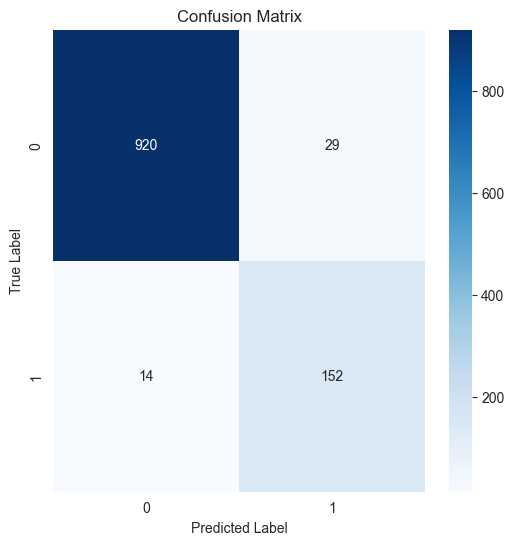

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred_y)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Naive Bayes:

model_nb = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',MultinomialNB()),
                   ])

model_nb.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred = model_nb.predict(X_test)
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.9730941704035875
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       949
        spam       0.92      0.90      0.91       166

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.95      1115
weighted avg       0.97      0.97      0.97      1115



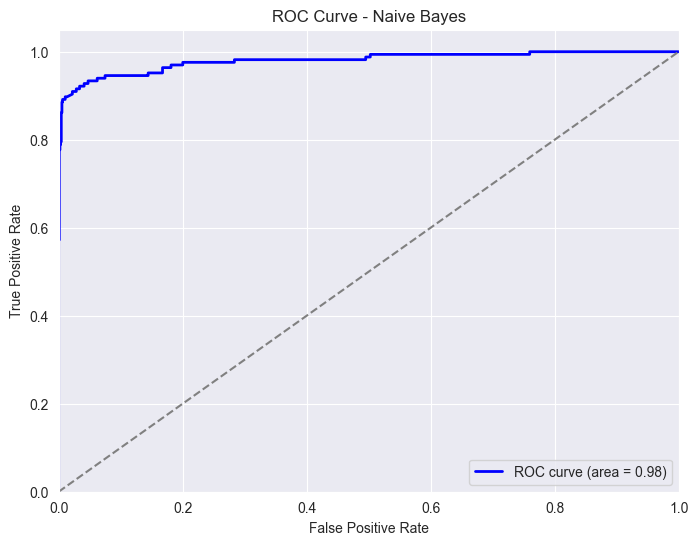

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Encode the target labels into binary format (0 and 1)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Obtain the predicted probabilities for the positive class (class 1) from the Naive Bayes model
y_probs_nb = model_nb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_encoded, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot the ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()


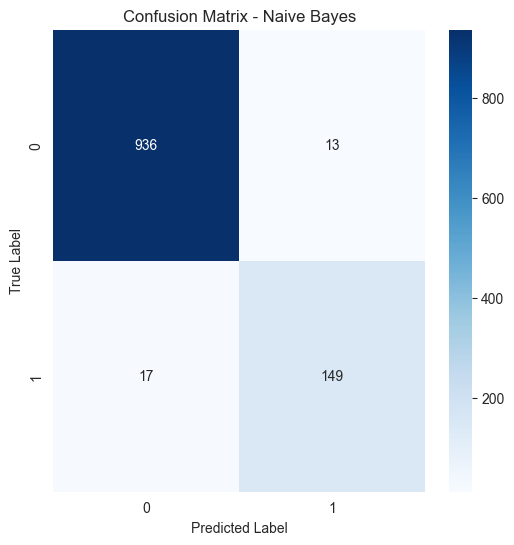

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain the predicted labels for the Naive Bayes model
y_pred_nb = model_nb.predict(X_test)

# Calculate the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [ ]:
#Random Forest Classifier

model_rf = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',RandomForestClassifier(n_estimators=50)),
                   ])

model_rf.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
preds = model_rf.predict(X_test)
print('accuracy %s' % accuracy_score(preds, y_test))
print(classification_report(ytest, preds))

accuracy 0.9255605381165919
              precision    recall  f1-score   support

         ham       0.98      0.93      0.96       949
        spam       0.70      0.88      0.78       166

    accuracy                           0.93      1115
   macro avg       0.84      0.91      0.87      1115
weighted avg       0.94      0.93      0.93      1115



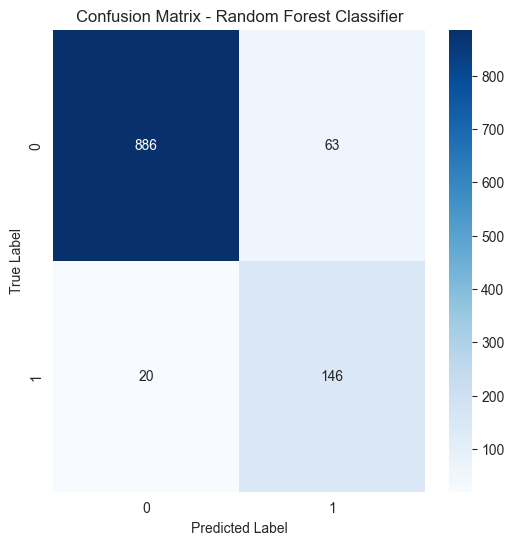

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain the predicted labels for the Random Forest Classifier model
y_pred_rf = model_rf.predict(X_test)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


In [ ]:
#Gradient Boosting

model_gb = Pipeline([('tfidf', TfidfTransformer()),
                    ('model', GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6)),
                    ])

model_gb.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
y_pred = model_gb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(ytest, y_pred))

accuracy 0.9650224215246637
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       949
        spam       0.87      0.90      0.88       166

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115



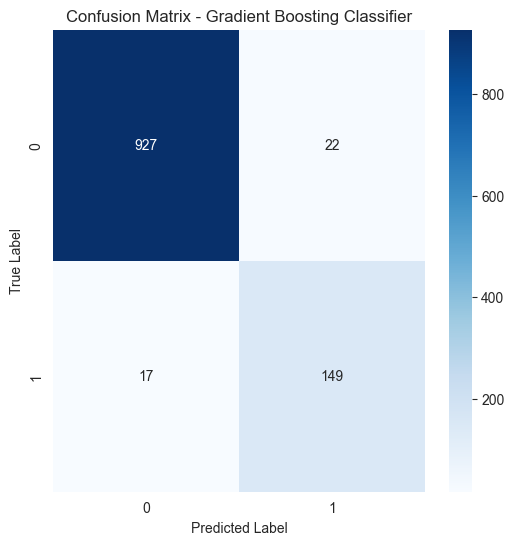

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain the predicted labels for the Gradient Boosting Classifier model
y_pred_gb = model_gb.predict(X_test)

# Calculate the confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()


In [ ]:
#Support Vector Machine

model_svc = Pipeline([('tfidf', TfidfTransformer()),
                     ('model',LinearSVC()),
                     ])

model_svc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
predict = model_svc.predict(X_test)
print('accuracy %s' % accuracy_score(predict, y_test))
print(classification_report(ytest, predict))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy 0.9434977578475336
              precision    recall  f1-score   support

         ham       0.98      0.95      0.97       949
        spam       0.76      0.90      0.83       166

    accuracy                           0.94      1115
   macro avg       0.87      0.93      0.90      1115
weighted avg       0.95      0.94      0.95      1115



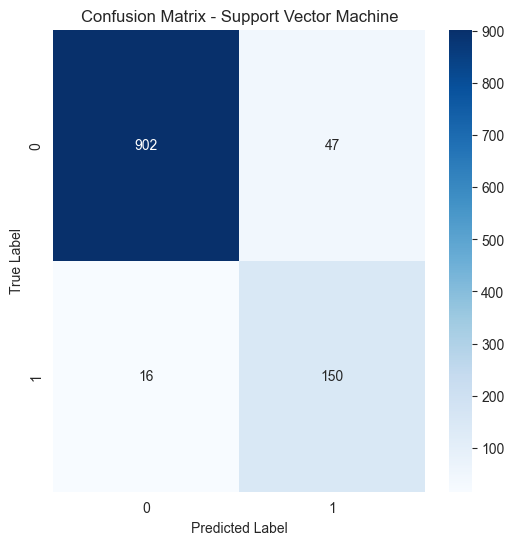

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain the predicted labels for the Support Vector Machine model
y_pred_svc = model_svc.predict(X_test)

# Calculate the confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()


In [ ]:
#Best model

#We tested six different models and now, we check which one is the best:

log_acc = accuracy_score(pred_y, y_test)
nb_acc = accuracy_score(pred, y_test)
rf_acc = accuracy_score(preds, y_test)
gb_acc = accuracy_score(y_pred, y_test)
svm_acc = accuracy_score(predict, y_test)

models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'SVM'],
                      'Score': [log_acc, nb_acc, rf_acc, gb_acc, svm_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,0.973094
3,Gradient Boosting,0.965022
0,Logistic Regression,0.961435
4,SVM,0.943498
2,Random Forest,0.925561


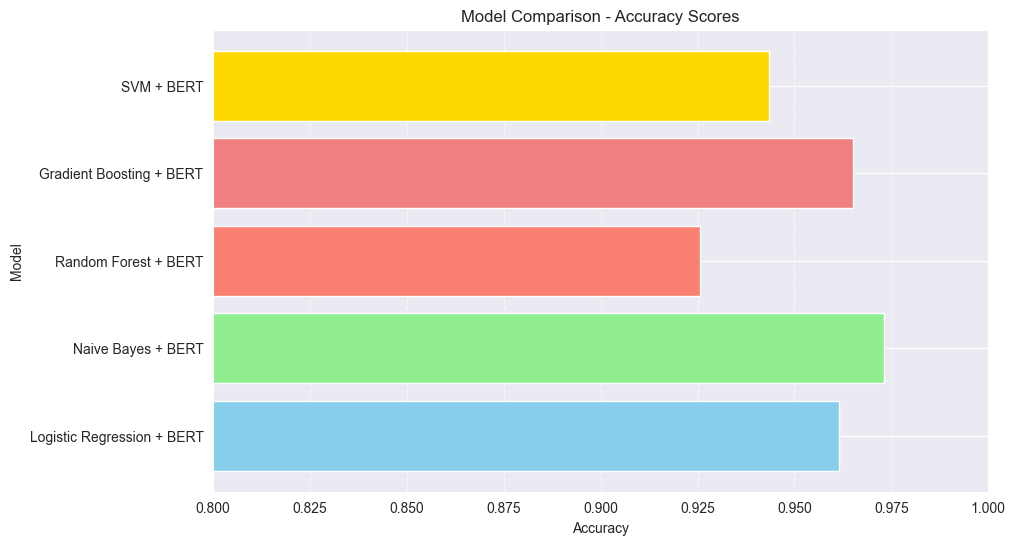

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for different models
model_names = ['Logistic Regression + BERT', 'Naive Bayes + BERT', 'Random Forest + BERT', 'Gradient Boosting + BERT', 'SVM + BERT']
accuracy_scores = [log_acc, nb_acc, rf_acc, gb_acc, svm_acc]

# Define custom colors for each model
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold']

# Create a horizontal bar plot with custom colors
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color=colors)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Comparison - Accuracy Scores')
plt.xlim(0.8, 1.0)  # Set the x-axis range to better visualize the differences
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better visibility
plt.show()


In [ ]:
data1.head()

,Message,Spam_Status,num_words
0,"Go until jurong point, crazy.. Available only ...",ham,20
1,Ok lar... Joking wif u oni...,ham,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,33
3,U dun say so early hor... U c already then say...,ham,11
4,"Nah I don't think he goes to usf, he lives aro...",ham,14


In [ ]:
import transformers
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.optimizers import Adam
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

data1["Spam_Status"] = data1["Spam_Status"].replace({"ham": 0, "spam": 1})

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
tokenizer

BertTokenizer(name_or_path='bert-large-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
#Spliting the data into train and test sets:
X = data1['Message']
y = data1['Spam_Status']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
#The function which allows to encode our dataset with BERT tokenizer. We have decided on a maximum sentence length is 64 (maxlen).


def encode(text, maxlen):
  input_ids=[]
  attention_masks=[]

  for row in text:
    encoded = tokenizer.encode_plus(
        row,
        add_special_tokens=True,
        max_length=maxlen,
        pad_to_max_length=True,
        return_attention_mask=True,
    )
    input_ids.append(encoded['input_ids'])
    attention_masks.append(encoded['attention_mask'])

  return np.array(input_ids),np.array(attention_masks)

In [ ]:
X_train_input_ids, X_train_attention_masks = encode(X_train.values, maxlen=64)
X_test_input_ids, X_test_attention_masks = encode(X_test.values, maxlen=64)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
#Build the model
#We create a model using BERT model and then add two Dense layers with Dropout layer.
from tensorflow.keras.optimizers import Adam
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

def build_model(bert_model):
   input_word_ids = tf.keras.Input(shape=(64,),dtype='int32')
   attention_masks = tf.keras.Input(shape=(64,),dtype='int32')

   sequence_output = bert_model([input_word_ids,attention_masks])
   output = sequence_output[1]
   output = tf.keras.layers.Dense(32,activation='relu')(output)
   output = tf.keras.layers.Dropout(0.2)(output)
   output = tf.keras.layers.Dense(1,activation='sigmoid')(output)

   model = tf.keras.models.Model(inputs = [input_word_ids,attention_masks], outputs = output)
   model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

   return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from keras.models import Model

model = build_model(bert_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 64)]                 0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 64, 76                                           
                             8),                                                              

In [ ]:
#We set class weights for the loss function to adjust for class imbalance. 'Spam' variable is set to weight 8x more.

#We train the model for 5 epoch:


class_weight = {0: 1, 1: 8}

In [ ]:
history = model.fit(
    [X_train_input_ids, X_train_attention_masks],
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=([X_test_input_ids, X_test_attention_masks], y_test),
    class_weight=class_weight)

Epoch 1/5
140/140 [==============================] - 115900s 831s/step - loss: 1.4000 - accuracy: 0.3170 - val_loss: 0.7451 - val_accuracy: 0.1489
Epoch 2/5
 11/140 [=>............................] - ETA: 6:08:06 - loss: 1.2864 - accuracy: 0.1222

In [ ]:
#Visualization of training:

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")